In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Reading the data

In [3]:
file_path_screwdriver = r"C:\Users\Daniel\OneDrive\Bachelorarbeit\Daten\Datenaufnahme\Schraubendreher\1\2021-02-08Griff_Schraubendreher_ml EULERWINKEL.json"
file_path_fist = r"C:\Users\Daniel\OneDrive\Bachelorarbeit\Daten\Datenaufnahme\Faust\1\2021-02-08Faust_ml EULERWINKEL.json"
df_screwdriver = pd.read_json(file_path_screwdriver)
df_fist = pd.read_json(file_path_fist)

# Preprocessing

In [4]:
df_screwdriver.head()
#df.sample(10)

,phi,theta,psi,accX,accY,accZ,nameOfTask,userName,timeStamp,frameNumber,recordingNumber,typeOfRecording
0,"[-3.099991755198194, -0.34176092745658804, -0....","[-0.25186420991818304, 0.105667557468056, -1.0...","[0.986599007872573, -0.023337713198158003, -3....","[0.052691999999999996, -0.00015600000000000002...","[-0.037947, 0.011047999999999999, 0.048052, 0....","[0.057099, -0.0039059999999999997, 0.039547, -...",2021-02-08Griff_Schraubendreher_ml,-1,2021-02-08 10:26:04.840999842,43291,1,6
1,"[-3.09635428331108, -0.350613732759508, -0.030...","[-0.24841092096738102, 0.11023523884091001, -1...","[0.9868686556399041, -0.026869497884002003, -3...","[0.017114, -0.01899, 0.102838, 0.025011, 0.011...","[-0.000812, 0.021272, 0.023920999999999998, 0....","[-0.018637, 0.036375, 0.11451499999999999, -0....",2021-02-08Griff_Schraubendreher_ml,-1,2021-02-08 10:26:05.174000025,43301,1,6
2,"[-3.09635428331108, -0.350613732759508, -0.030...","[-0.24841092096738102, 0.11023523884091001, -1...","[0.9868686556399041, -0.026869497884002003, -3...","[0.017114, -0.023094, -0.031800999999999996, 0...","[-0.000812, -0.014856999999999999, -0.070271, ...","[-0.018637, -0.06293599999999999, -0.146164, 0...",2021-02-08Griff_Schraubendreher_ml,-1,2021-02-08 10:26:05.206999779,43302,1,6
3,"[-3.09635428331108, -0.351148677093969, -0.029...","[-0.24841092096738102, 0.11090753032435001, -1...","[0.9868686556399041, -0.027268226397941003, -3...","[0.046856999999999996, -0.040185, 0.025996, 0....","[-0.029146, -0.014199, -0.034952, -0.013939, 0...","[0.009911, 0.030994999999999998, 0.090491, 0.0...",2021-02-08Griff_Schraubendreher_ml,-1,2021-02-08 10:26:05.240999937,43303,1,6
4,"[-3.09635428331108, -0.351148677093969, -0.029...","[-0.24841092096738102, 0.11090753032435001, -1...","[0.9868686556399041, -0.027268226397941003, -3...","[0.007502, -0.005744, -0.029821999999999998, 0...","[-0.0037649999999999997, 0.021554, 0.002349, 0...","[0.011965, 0.013750000000000002, -0.0105919999...",2021-02-08Griff_Schraubendreher_ml,-1,2021-02-08 10:26:05.273999929,43304,1,6


In [5]:
df_screwdriver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13176 entries, 0 to 13175
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   phi              13176 non-null  object        
 1   theta            13176 non-null  object        
 2   psi              13176 non-null  object        
 3   accX             13176 non-null  object        
 4   accY             13176 non-null  object        
 5   accZ             13176 non-null  object        
 6   nameOfTask       13176 non-null  object        
 7   userName         13176 non-null  int64         
 8   timeStamp        13176 non-null  datetime64[ns]
 9   frameNumber      13176 non-null  int64         
 10  recordingNumber  13176 non-null  int64         
 11  typeOfRecording  13176 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
print(df_screwdriver.shape)
#print(df_screwdriver.describe())

(13176, 12)


In [7]:
df_screwdriver.drop(["userName","typeOfRecording","nameOfTask"],axis=1,inplace=True)
df_screwdriver.sort_values(["timeStamp"],ignore_index=True,inplace=True)
df_screwdriver.drop_duplicates(subset=["timeStamp"],keep="first",inplace=True,ignore_index=True)
df_screwdriver.head()

,phi,theta,psi,accX,accY,accZ,timeStamp,frameNumber,recordingNumber
0,"[-3.099991755198194, -0.34176092745658804, -0....","[-0.25186420991818304, 0.105667557468056, -1.0...","[0.986599007872573, -0.023337713198158003, -3....","[0.052691999999999996, -0.00015600000000000002...","[-0.037947, 0.011047999999999999, 0.048052, 0....","[0.057099, -0.0039059999999999997, 0.039547, -...",2021-02-08 10:26:04.840999842,43291,1
1,"[-3.099264195092009, -0.34283778181079605, -0....","[-0.25128315209456203, 0.10537330760081501, -1...","[0.9866276248304721, -0.022847743313952004, -3...","[0.023943, -0.045922, -0.058025999999999994, 0...","[-0.007743, -0.02128, -0.023585, -0.016905, -0...","[0.020853999999999998, -0.058086, -0.089409, 0...",2021-02-08 10:26:04.874000072,43292,1
2,"[-3.098991799395583, -0.343987736074917, -0.07...","[-0.2510143928558, 0.10580203429526001, -1.086...","[0.986707711360265, -0.023233381178098002, -3....","[0.044816999999999996, 0.004726999999999999, 0...","[0.023826999999999997, -0.001977, -0.013443, 0...","[0.030549, -0.029043, -0.0014529999999999999, ...",2021-02-08 10:26:04.907000065,43293,1
3,"[-3.098991799395583, -0.345417468001523, -0.06...","[-0.2510143928558, 0.10700270996869, -1.089496...","[0.986707711360265, -0.024144249907558, -3.030...","[0.044816999999999996, 0.017332999999999998, 0...","[0.023826999999999997, -0.00248, 0.005229, 0.0...","[0.030549, 0.015578999999999999, 0.089334, -0....",2021-02-08 10:26:04.940999985,43294,1
4,"[-3.098435052528825, -0.345417468001523, -0.06...","[-0.250482396131298, 0.10700270996869, -1.0894...","[0.986756380579293, -0.024144249907558, -3.030...","[0.024753999999999998, 0.017332999999999998, 0...","[-0.005931, -0.00248, 0.005229, 0.056212, 0.02...","[0.013267999999999999, 0.015578999999999999, 0...",2021-02-08 10:26:04.973999977,43295,1


In [58]:
df_screwdriver["timeStamp"] = pd.to_datetime.round(df_screwdriver['timeStamp'], unit='ms')
df_screwdriver.head()

AttributeError: 'function' object has no attribute 'round'

In [8]:
delta_time = df_screwdriver["timeStamp"].iloc[266]-df_screwdriver["timeStamp"].iloc[265]
delta_time

Timedelta('0 days 00:00:00.034000159')

In [9]:
df_fist.drop(["userName","typeOfRecording","nameOfTask"],axis=1,inplace=True)
df_fist.sort_values(["timeStamp"],ignore_index=True,inplace=True)
df_fist.drop_duplicates(subset=["timeStamp"],keep="first",inplace=True,ignore_index=True)
df_fist.head()

,phi,theta,psi,accX,accY,accZ,timeStamp,frameNumber,recordingNumber
0,"[-3.118076748816583, -0.333920426561088, -0.08...","[-0.26503149245521, 0.20645512801835, -1.16725...","[1.008453589306481, -0.08170777926853601, -3.0...","[0.023545, 0.016596, 0.068952, 0.0407849999999...","[-0.01305, 0.005895999999999999, 0.047337, 0.0...","[-0.020488, -0.018598999999999997, 0.026938999...",2021-02-08 10:31:40.942000151,53374,1
1,"[-3.118076748816583, -0.33608880099936805, -0....","[-0.26503149245521, 0.20753861472436602, -1.17...","[1.008453589306481, -0.08387754056954701, -3.0...","[-0.01855, -0.045995, -0.057689, -0.014369, -0...","[-0.001343, 0.050683, 0.080512, -0.01902000000...","[0.025713, -0.010338, 0.156693, -0.058301, 0.0...",2021-02-08 10:31:40.976000071,53375,1
2,"[-3.118076748816583, -0.339477831214323, -0.05...","[-0.26503149245521, 0.20871140553879003, -1.17...","[1.008453589306481, -0.086825528359548, -3.064...","[0.004666, -0.009868, -0.12695199999999998, 0....","[-0.015775, -0.0045839999999999995, -0.1189139...","[0.025092999999999997, -0.025686999999999998, ...",2021-02-08 10:31:41.008999825,53376,1
3,"[-3.118076748816583, -0.34093839439718004, -0....","[-0.26503149245521, 0.20955774880552702, -1.17...","[1.008453589306481, -0.08826124456152201, -3.0...","[0.004666, -0.035213999999999995, -0.078410000...","[-0.015775, -0.029311, -0.122308, 0.219354, -0...","[0.025092999999999997, -0.002561, -0.205281, 0...",2021-02-08 10:31:41.042000055,53377,1
4,"[-3.117801430967342, -0.342399496293784, -0.06...","[-0.265494503621495, 0.21288311175180602, -1.1...","[1.008747569826278, -0.090510446462067, -3.062...","[-0.005841, 0.012012, -0.006175, -0.0438700000...","[0.020560000000000002, 0.0018000000000000002, ...","[-0.007871, 0.017613, 0.074901, -0.046921, -0....",2021-02-08 10:31:41.075999975,53378,1


In [10]:
print("Number unique testing sequences SCREWDRIVER:\t {}".format(df_screwdriver["recordingNumber"].nunique()))
print("Number unique testing sequences FIST:\t\t {}".format(df_fist["recordingNumber"].nunique()))

Number unique testing sequences SCREWDRIVER:	 9
Number unique testing sequences FIST:		 10


In [11]:
n_sensors = len(df_screwdriver.loc[0]["phi"])
print(n_sensors)
df_screwdriver.loc[0]["phi"]
# phi value for each sensor for one moment (one point in time)

14


[-3.099991755198194,
 -0.34176092745658804,
 -0.072204900632534,
 -0.2748559103125,
 -0.15958225444509902,
 -0.099540365434666,
 0.0008232574914568344,
 0.080650762201317,
 -0.283347146365762,
 -0.070954656897366,
 0.080409062739526,
 0.198082098077199,
 0.230508702769312,
 0.225838294555115]

In [12]:
if (len(df_screwdriver.loc[0]["phi"])==len(df_fist.loc[0]["phi"])) : print("Same number of sensors used") 

Same number of sensors used


## Rearranging the data + combine the datasets

columns = 6 parameters (3x acc and 3x angle) for each sensor
   rows = each row represents one moment
   
all unique testing sequences are combined

last column ["label"]:

    1 = screwdriver
    2 = fist



In [13]:
column_names_list = df_screwdriver.columns.tolist()
column_names_list.remove("timeStamp")
column_names_list.remove("frameNumber")
column_names_list.remove("recordingNumber")
column_names_list

['phi', 'theta', 'psi', 'accX', 'accY', 'accZ']

In [14]:
# List with 14 Dataframes, one for each sensor
all_sensors_list_screwdriver = []
temp_df = df_screwdriver.copy()
for sensor_index in range(n_sensors):
    for index, row in df_screwdriver.iterrows():
        for c_name in column_names_list:
            temp_df[c_name].iloc[index] = row[c_name][sensor_index]
    temp_df[column_names_list] = temp_df[column_names_list].astype(float)
    all_sensors_list_screwdriver.append(temp_df.copy())

C:\Users\Daniel\anaconda3\envs\gputest\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
# List with 14 Dataframes, one for each sensor
all_sensors_list_fist = []
temp_df = df_fist.copy()
for sensor_index in range(n_sensors):
    for index, row in df_fist.iterrows():
        for c_name in column_names_list:
            temp_df[c_name].iloc[index] = row[c_name][sensor_index]
    temp_df[column_names_list] = temp_df[column_names_list].astype(float)
    all_sensors_list_fist.append(temp_df.copy())
#all_sensors_list_screwdriver[1].index[all_sensors_list_screwdriver[1]["recordingNumber"]==2]

In [16]:
index_recNum_list_srewdriver = []
for recording in range(1,df_screwdriver["recordingNumber"].nunique()+1):
    index_recNum_list_srewdriver.append(df_screwdriver[df_screwdriver["recordingNumber"]==recording].first_valid_index())
index_recNum_list_srewdriver.append(df_screwdriver.last_valid_index()+1)
index_recNum_list_srewdriver

[0, 253, 488, 732, 944, 1204, 1426, 1699, 1924, 2136]

In [17]:
index_recNum_list_fist = []
for recording in range(1,df_fist["recordingNumber"].nunique()+1):
    index_recNum_list_fist.append(df_fist[df_fist["recordingNumber"]==recording].first_valid_index())
index_recNum_list_fist.append(df_fist.last_valid_index()+1)
index_recNum_list_fist

[0, 172, 378, 618, 873, 1107, 1317, 1593, 1879, 2167, 2447]

#test

print(df_screwdriver[["recordingNumber","timeStamp"]].iloc[0])
print(df_screwdriver[["recordingNumber","timeStamp"]].iloc[1924])
print(df_screwdriver[["recordingNumber","timeStamp"]].iloc[2135])

print(df_fist[["recordingNumber","timeStamp"]].iloc[1878])
print(df_fist[["recordingNumber","timeStamp"]].iloc[1879])
print(df_fist[["recordingNumber","timeStamp"]].iloc[2166])
print(df_fist[["recordingNumber","timeStamp"]].iloc[2167])
print(df_fist[["recordingNumber","timeStamp"]].iloc[2446])

In [18]:
delta_time = []
for ind in range(1,len(index_recNum_list_fist)):
    t1 = df_fist["timeStamp"].iloc[index_recNum_list_fist[ind-1]]
    t2 = df_fist["timeStamp"].iloc[index_recNum_list_fist[ind]-1]
    delta_time.append((t2-t1))
arr = np.array(delta_time)
#print(arr)
arr.mean()

Timedelta('0 days 00:00:08.122999930')

In [19]:
delta_time = []
for ind in range(1,len(index_recNum_list_srewdriver)):
    t1 = df_screwdriver["timeStamp"].iloc[index_recNum_list_srewdriver[ind-1]]
    t2 = df_screwdriver["timeStamp"].iloc[index_recNum_list_srewdriver[ind]-1]
    delta_time.append((t2-t1))
arr = np.array(delta_time)
#print(arr)
arr.mean()

Timedelta('0 days 00:00:07.877888970')

In [20]:
data_srewdriver = df_screwdriver.copy()
data_srewdriver = data_srewdriver[["recordingNumber","timeStamp","frameNumber"]]
data_srewdriver

,recordingNumber,timeStamp,frameNumber
0,1,2021-02-08 10:26:04.840999842,43291
1,1,2021-02-08 10:26:04.874000072,43292
2,1,2021-02-08 10:26:04.907000065,43293
3,1,2021-02-08 10:26:04.940999985,43294
4,1,2021-02-08 10:26:04.973999977,43295
...,...,...,...
2131,9,2021-02-08 10:28:07.775000095,46979
2132,9,2021-02-08 10:28:07.806999922,46980
2133,9,2021-02-08 10:28:07.841000080,46981
2134,9,2021-02-08 10:28:07.875000000,46982


In [59]:
all_sensors_list_screwdriver

[           phi     theta       psi      accX      accY      accZ  \
 0    -3.099992 -0.251864  0.986599  0.052692 -0.037947  0.057099   
 1    -3.099264 -0.251283  0.986628  0.023943 -0.007743  0.020854   
 2    -3.098992 -0.251014  0.986708  0.044817  0.023827  0.030549   
 3    -3.098992 -0.251014  0.986708  0.044817  0.023827  0.030549   
 4    -3.098435 -0.250482  0.986756  0.024754 -0.005931  0.013268   
 ...        ...       ...       ...       ...       ...       ...   
 2131 -3.099260 -0.243635  0.981975 -0.006736 -0.005738  0.034248   
 2132 -3.099260 -0.243635  0.981975 -0.006736 -0.005738  0.034248   
 2133 -3.099260 -0.243635  0.981975 -0.002882  0.003009 -0.003627   
 2134 -3.099260 -0.243635  0.981975  0.001329  0.009314 -0.001742   
 2135 -3.099260 -0.243635  0.981975  0.001329  0.009314 -0.001742   
 
                          timeStamp  frameNumber  recordingNumber  
 0    2021-02-08 10:26:04.840999842        43291                1  
 1    2021-02-08 10:26:04.87400007

In [21]:
for ind_sensor in range(n_sensors):
    for ind_feat in range(6):
        col_name = column_names_list[ind_feat]+str(ind_sensor)
        data_srewdriver[col_name] = all_sensors_list_screwdriver[ind_sensor][column_names_list[ind_feat]]
data_srewdriver["label"] = 1
data_srewdriver.head()

,recordingNumber,timeStamp,frameNumber,phi0,theta0,psi0,accX0,accY0,accZ0,phi1,...,accX12,accY12,accZ12,phi13,theta13,psi13,accX13,accY13,accZ13,label
0,1,2021-02-08 10:26:04.840999842,43291,-3.099992,-0.251864,0.986599,0.052692,-0.037947,0.057099,-0.341761,...,-0.192187,-0.057048,0.335394,0.225838,-0.292762,0.669282,-0.224155,-0.062544,0.400648,1
1,1,2021-02-08 10:26:04.874000072,43292,-3.099264,-0.251283,0.986628,0.023943,-0.007743,0.020854,-0.342838,...,-0.080367,-0.088077,-0.171578,0.224768,-0.294493,0.670230,-0.040612,0.017532,-0.294340,1
2,1,2021-02-08 10:26:04.907000065,43293,-3.098992,-0.251014,0.986708,0.044817,0.023827,0.030549,-0.343988,...,0.079542,0.002126,-0.097973,0.224612,-0.294871,0.670486,0.106944,-0.051276,-0.009687,1
3,1,2021-02-08 10:26:04.940999985,43294,-3.098992,-0.251014,0.986708,0.044817,0.023827,0.030549,-0.345417,...,-0.051852,0.027972,-0.113384,0.225321,-0.297056,0.671869,-0.024738,-0.025348,-0.045350,1
4,1,2021-02-08 10:26:04.973999977,43295,-3.098435,-0.250482,0.986756,0.024754,-0.005931,0.013268,-0.345417,...,-0.040753,-0.019390,0.002805,0.226185,-0.297756,0.672643,-0.165805,-0.128674,-0.021833,1


In [22]:
data_fist = df_fist.copy()
data_fist = data_fist[["recordingNumber","timeStamp","frameNumber"]]
data_fist

,recordingNumber,timeStamp,frameNumber
0,1,2021-02-08 10:31:40.942000151,53374
1,1,2021-02-08 10:31:40.976000071,53375
2,1,2021-02-08 10:31:41.008999825,53376
3,1,2021-02-08 10:31:41.042000055,53377
4,1,2021-02-08 10:31:41.075999975,53378
...,...,...,...
2442,10,2021-02-08 10:33:58.108999968,57489
2443,10,2021-02-08 10:33:58.142999887,57490
2444,10,2021-02-08 10:33:58.176999807,57491
2445,10,2021-02-08 10:33:58.209000111,57492


all_sensors_list_fist

In [23]:
for ind_sensor in range(n_sensors):
    for ind_feat in range(6):
        col_name = column_names_list[ind_feat]+str(ind_sensor)
        data_fist[col_name] = all_sensors_list_fist[ind_sensor][column_names_list[ind_feat]]
data_fist["label"] = 2
data_fist.head()

,recordingNumber,timeStamp,frameNumber,phi0,theta0,psi0,accX0,accY0,accZ0,phi1,...,accX12,accY12,accZ12,phi13,theta13,psi13,accX13,accY13,accZ13,label
0,1,2021-02-08 10:31:40.942000151,53374,-3.118077,-0.265031,1.008454,0.023545,-0.013050,-0.020488,-0.333920,...,0.098876,0.499006,0.230281,0.155133,-0.239179,0.990093,0.259847,0.388906,0.373876,2
1,1,2021-02-08 10:31:40.976000071,53375,-3.118077,-0.265031,1.008454,-0.018550,-0.001343,0.025713,-0.336089,...,0.003207,0.123955,-0.175668,0.154752,-0.242360,0.998239,0.135430,0.264501,-0.252038,2
2,1,2021-02-08 10:31:41.008999825,53376,-3.118077,-0.265031,1.008454,0.004666,-0.015775,0.025093,-0.339478,...,-0.029397,-0.126940,0.210660,0.153998,-0.245201,1.004363,-0.128449,-0.103791,0.319710,2
3,1,2021-02-08 10:31:41.042000055,53377,-3.118077,-0.265031,1.008454,0.004666,-0.015775,0.025093,-0.340938,...,0.144977,-0.012840,0.086091,0.153208,-0.246982,1.009078,0.109099,0.022962,-0.131798,2
4,1,2021-02-08 10:31:41.075999975,53378,-3.117801,-0.265495,1.008748,-0.005841,0.020560,-0.007871,-0.342399,...,0.080459,-0.020516,-0.390120,0.151525,-0.248884,1.015170,0.054505,0.048795,-0.323801,2


In [24]:
data_fist.tail()

,recordingNumber,timeStamp,frameNumber,phi0,theta0,psi0,accX0,accY0,accZ0,phi1,...,accX12,accY12,accZ12,phi13,theta13,psi13,accX13,accY13,accZ13,label
2442,10,2021-02-08 10:33:58.108999968,57489,-3.101185,-0.259323,0.995941,-0.025081,-0.016308,-0.018873,-0.371827,...,-0.093461,-0.024301,0.113809,0.188865,-0.240217,0.950502,-0.041030,-0.013941,0.176515,2
2443,10,2021-02-08 10:33:58.142999887,57490,-3.101185,-0.259323,0.995941,0.007077,-0.048536,0.017174,-0.371407,...,-0.032861,-0.036520,-0.231586,0.188396,-0.240344,0.948447,-0.009833,0.002942,-0.117649,2
2444,10,2021-02-08 10:33:58.176999807,57491,-3.101185,-0.259323,0.995941,0.007077,-0.048536,0.017174,-0.371148,...,0.083403,-0.104163,0.091948,0.187876,-0.240420,0.947173,0.068939,-0.039344,-0.001130,2
2445,10,2021-02-08 10:33:58.209000111,57492,-3.101185,-0.259323,0.995941,-0.004127,-0.001223,0.027562,-0.371148,...,-0.002063,-0.048087,-0.077849,0.187152,-0.240386,0.945828,-0.051900,-0.089484,-0.055887,2
2446,10,2021-02-08 10:33:58.243000031,57493,-3.101185,-0.259323,0.995941,-0.000833,0.006183,-0.002618,-0.371148,...,-0.009213,0.078099,0.065679,0.186488,-0.240263,0.944539,0.051060,0.112721,0.046783,2


In [25]:
#data_fist.info()
data_fist.shape
#data_fist.describe()

(2447, 88)

In [26]:
#data_srewdriver.info()
data_srewdriver.shape
#data_srewdriver.describe()

(2136, 88)

In [27]:
t1 = data_srewdriver.copy()
t2 = data_fist.copy()
result = pd.concat([t1,t2],ignore_index=True)
result.shape

(4583, 88)

In [28]:
index_recNum_list_fist

[0, 172, 378, 618, 873, 1107, 1317, 1593, 1879, 2167, 2447]

In [29]:
index_recNum_list_fist = [x+index_recNum_list_srewdriver[-1]  for x in index_recNum_list_fist]
index_recNum_list_fist

[2136, 2308, 2514, 2754, 3009, 3243, 3453, 3729, 4015, 4303, 4583]

In [30]:
result.sample(10)

,recordingNumber,timeStamp,frameNumber,phi0,theta0,psi0,accX0,accY0,accZ0,phi1,...,accX12,accY12,accZ12,phi13,theta13,psi13,accX13,accY13,accZ13,label
696,3,2021-02-08 10:26:43.006999969,44436,-3.095602,-0.246780,0.982895,-0.016324,0.002680,0.011094,-0.374634,...,0.164165,0.112857,-0.283388,0.201745,-0.253249,0.465058,0.199795,0.112116,-0.276245,1
220,1,2021-02-08 10:26:12.174000263,43511,-3.095343,-0.248204,0.986306,0.017853,0.000987,-0.026218,-0.342531,...,0.144813,0.036796,-0.211187,0.118183,-0.282589,0.522108,0.094891,0.062734,-0.166874,1
909,4,2021-02-08 10:26:57.073999882,44858,-3.094464,-0.245994,0.982773,0.004815,-0.006514,-0.005093,-0.373221,...,0.215177,0.167449,-0.289407,0.150307,-0.229926,0.516326,0.228486,0.113400,-0.299660,1
3710,7,2021-02-08 10:33:09.442999840,56029,-3.101188,-0.263633,0.998682,0.024807,-0.018859,-0.006005,-0.367284,...,-0.038224,-0.050578,0.018568,0.206648,-0.236789,0.972220,-0.046514,0.056991,-0.086499,2
3847,8,2021-02-08 10:33:20.243000031,56353,-3.101116,-0.262803,0.998356,0.003166,0.009492,0.039148,-0.364596,...,0.133541,-0.083062,-0.080067,2.103977,-0.181728,1.211845,0.066277,-0.101238,0.108143,2
2933,4,2021-02-08 10:32:23.343000174,54646,-3.102499,-0.263656,0.999025,0.004206,-0.030941,0.013015,-0.372664,...,0.041860,0.596407,0.677021,-0.107102,-0.168141,0.989223,0.217398,0.580710,0.545930,2
3179,5,2021-02-08 10:32:38.575999975,55103,-3.104630,-0.260705,0.999616,-0.034104,-0.001724,-0.016380,-0.365150,...,0.023522,0.271366,0.582053,-0.005018,-0.169500,0.905750,-0.022100,0.234620,0.436635,2
876,4,2021-02-08 10:26:55.973999977,44825,-3.094464,-0.245994,0.982773,0.009732,-0.041343,-0.012822,-0.374973,...,-1.047163,-0.888404,0.913949,0.604764,-0.317392,0.658197,-0.975389,-0.876869,0.289420,1
2780,4,2021-02-08 10:32:18.242000103,54493,-3.102499,-0.263656,0.999025,0.021376,-0.003693,0.013622,-0.372664,...,0.047281,0.051854,0.059663,0.015702,-0.238560,1.025857,0.150718,0.149862,0.077483,2
1667,7,2021-02-08 10:27:39.240999937,46123,-3.095567,-0.243405,0.983786,0.032489,0.022929,-0.019676,-0.377639,...,-0.079052,-0.060819,0.008770,0.170424,-0.212546,0.599446,-0.201621,-0.085486,0.050476,1


In [31]:
pure_data = result[result.columns[(3+6*7):]]
pure_data

,phi7,theta7,psi7,accX7,accY7,accZ7,phi8,theta8,psi8,accX8,...,accX12,accY12,accZ12,phi13,theta13,psi13,accX13,accY13,accZ13,label
0,0.080651,0.148847,-0.959140,-0.049675,0.134449,0.103026,-0.283347,-0.518190,-0.919459,-0.056956,...,-0.192187,-0.057048,0.335394,0.225838,-0.292762,0.669282,-0.224155,-0.062544,0.400648,1
1,0.080651,0.148847,-0.959140,-0.049675,0.134449,0.103026,-0.286494,-0.523345,-0.917932,-0.138175,...,-0.080367,-0.088077,-0.171578,0.224768,-0.294493,0.670230,-0.040612,0.017532,-0.294340,1
2,0.083520,0.145020,-0.958043,0.155792,-0.073801,-0.054326,-0.288562,-0.524751,-0.916598,-0.120184,...,0.079542,0.002126,-0.097973,0.224612,-0.294871,0.670486,0.106944,-0.051276,-0.009687,1
3,0.084042,0.144297,-0.957704,0.083194,-0.060714,-0.035120,-0.289412,-0.525137,-0.915855,-0.085881,...,-0.051852,0.027972,-0.113384,0.225321,-0.297056,0.671869,-0.024738,-0.025348,-0.045350,1
4,0.084970,0.142817,-0.957260,0.080727,-0.063714,-0.082944,-0.291794,-0.527175,-0.915196,-0.099641,...,-0.040753,-0.019390,0.002805,0.226185,-0.297756,0.672643,-0.165805,-0.128674,-0.021833,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,-0.000788,0.131263,-0.888502,-0.076930,-0.029085,0.101990,-0.383999,-0.487630,-0.916883,-0.021625,...,-0.093461,-0.024301,0.113809,0.188865,-0.240217,0.950502,-0.041030,-0.013941,0.176515,2
4579,0.000603,0.129653,-0.889342,-0.013478,0.004246,-0.029982,-0.383999,-0.487630,-0.916883,-0.021625,...,-0.032861,-0.036520,-0.231586,0.188396,-0.240344,0.948447,-0.009833,0.002942,-0.117649,2
4580,0.001227,0.128868,-0.889633,0.012872,-0.102590,-0.082346,-0.383633,-0.488823,-0.918637,-0.029767,...,0.083403,-0.104163,0.091948,0.187876,-0.240420,0.947173,0.068939,-0.039344,-0.001130,2
4581,0.001227,0.128868,-0.889633,0.012872,-0.102590,-0.082346,-0.383148,-0.490075,-0.920805,0.028057,...,-0.002063,-0.048087,-0.077849,0.187152,-0.240386,0.945828,-0.051900,-0.089484,-0.055887,2


## Datavisualisation

<AxesSubplot:>

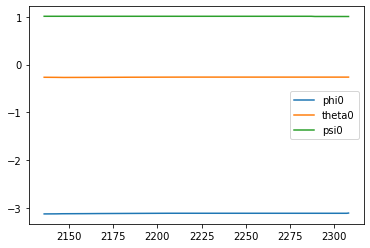

In [32]:
result.loc[index_recNum_list_fist[0]:index_recNum_list_fist[1]].plot(y=["phi0","theta0","psi0"])

In [33]:
#pure_data.iloc[:253].hist(figsize=(20,15))
#plt.show()

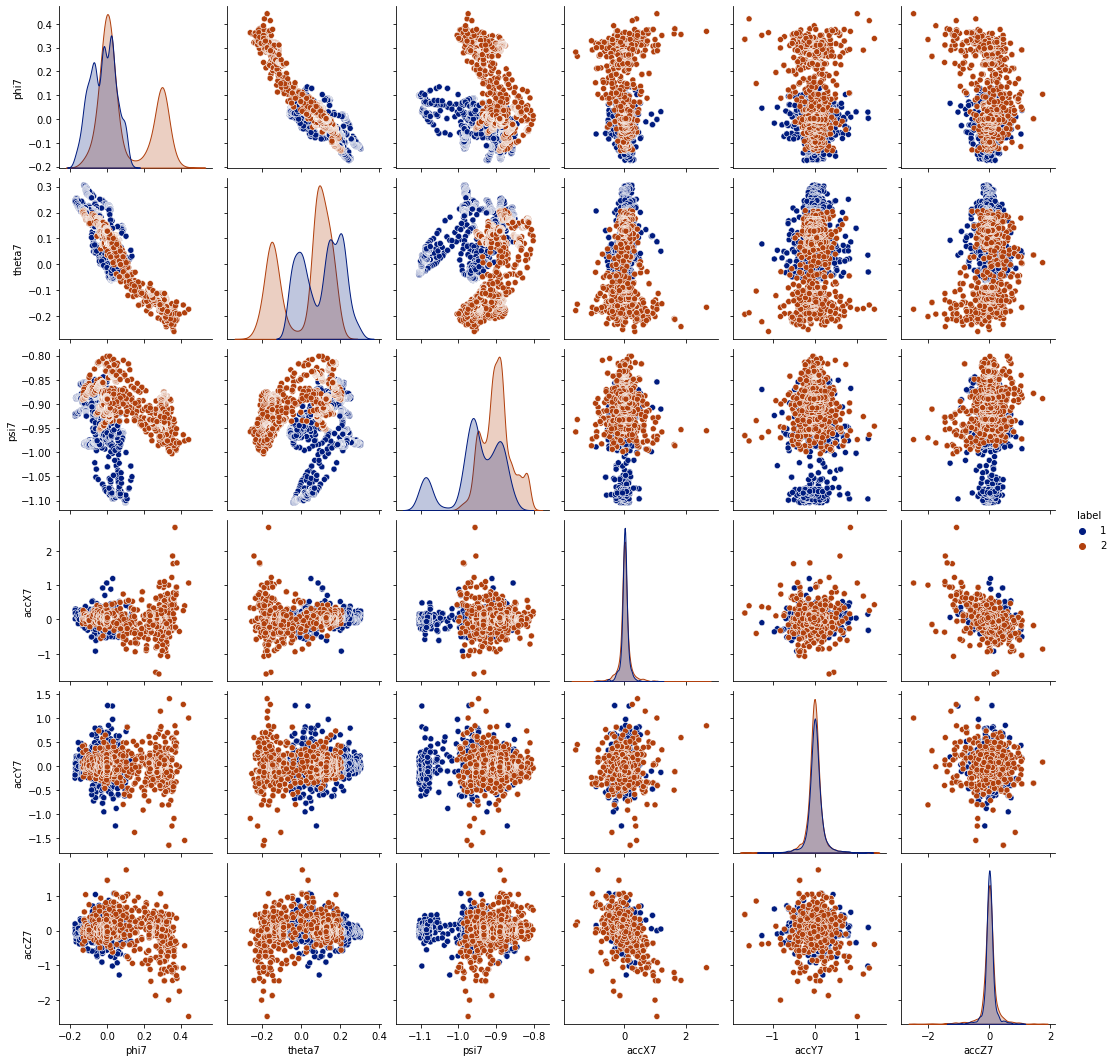

In [34]:
cols = []
cols.extend(list(pure_data.columns[:6]))
cols.append("label")
cols

sns.pairplot(pure_data[cols],hue="label",palette="dark")

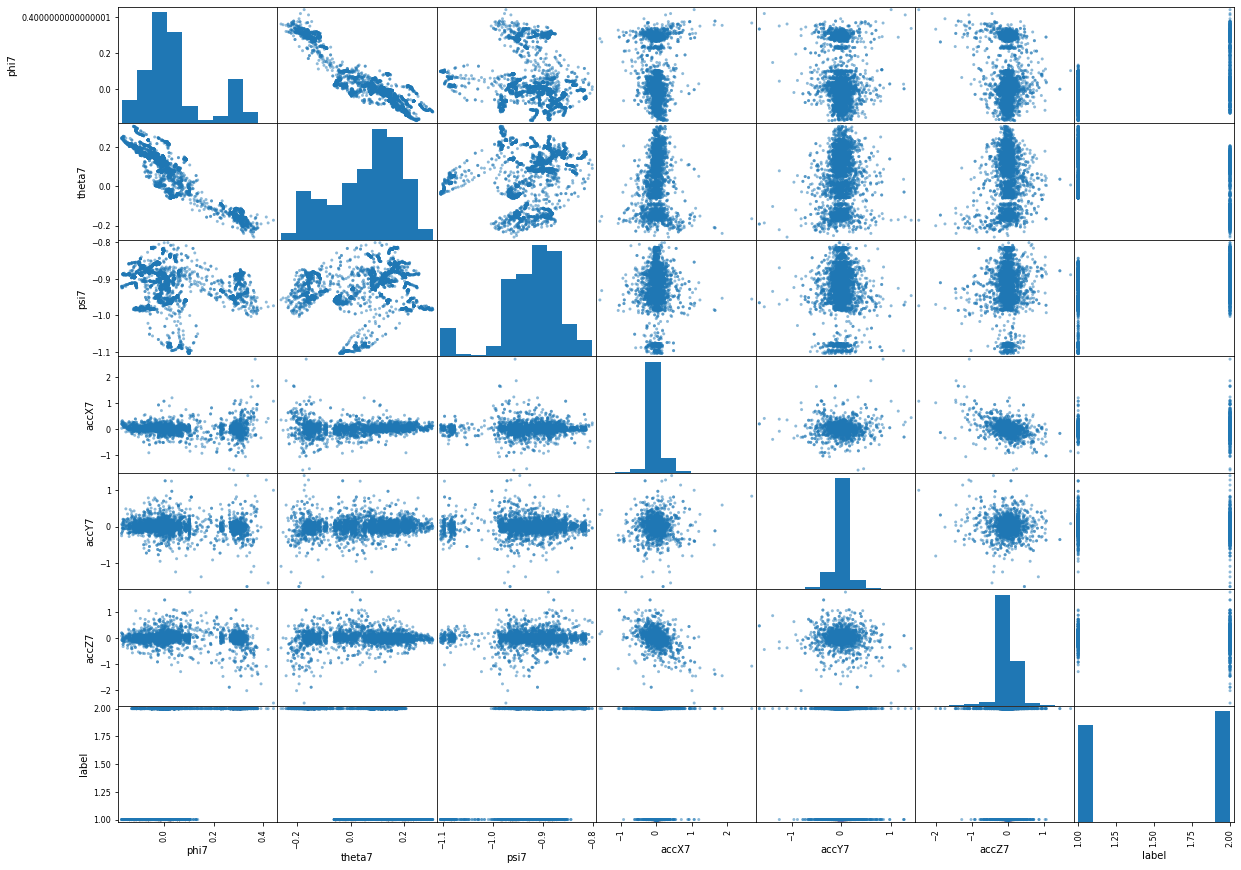

In [35]:
scatter_matrix(pure_data[cols],figsize=(20,15))
plt.show()

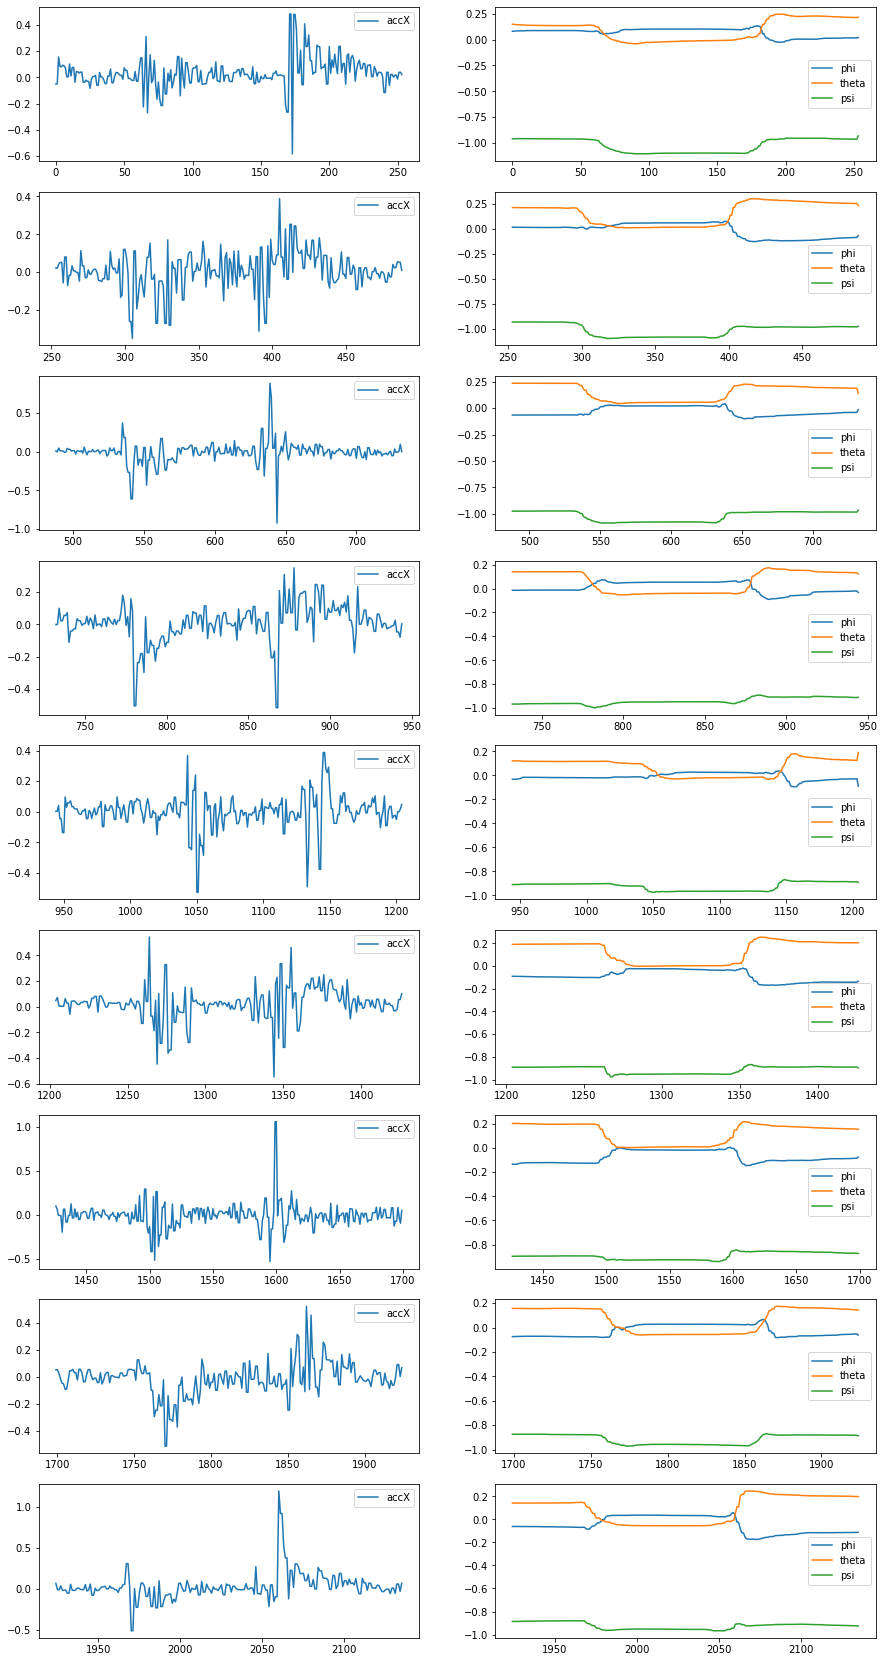

In [36]:
test_sensor = 7
#all_sensors_list_screwdriver[test_sensor].loc[0:253].plot(y=["phi","theta","psi"])
#all_sensors_list_screwdriver[test_sensor].loc[0:253].plot(y=["accX","accY","accZ"])
df3 = all_sensors_list_screwdriver[test_sensor].copy()

fig, axes = plt.subplots(nrows=len(index_recNum_list_srewdriver)-1,ncols=2,figsize=(15,30))
for temp_ind in range(1,len(index_recNum_list_srewdriver)):
    df3.loc[index_recNum_list_srewdriver[temp_ind-1]:index_recNum_list_srewdriver[temp_ind]].plot(y=["accX"],ax=axes[temp_ind-1,0])
    df3.loc[index_recNum_list_srewdriver[temp_ind-1]:index_recNum_list_srewdriver[temp_ind]].plot(y=["phi","theta","psi"],ax=axes[temp_ind-1,1])

In [37]:
index_recNum_list_srewdriver[1]

253

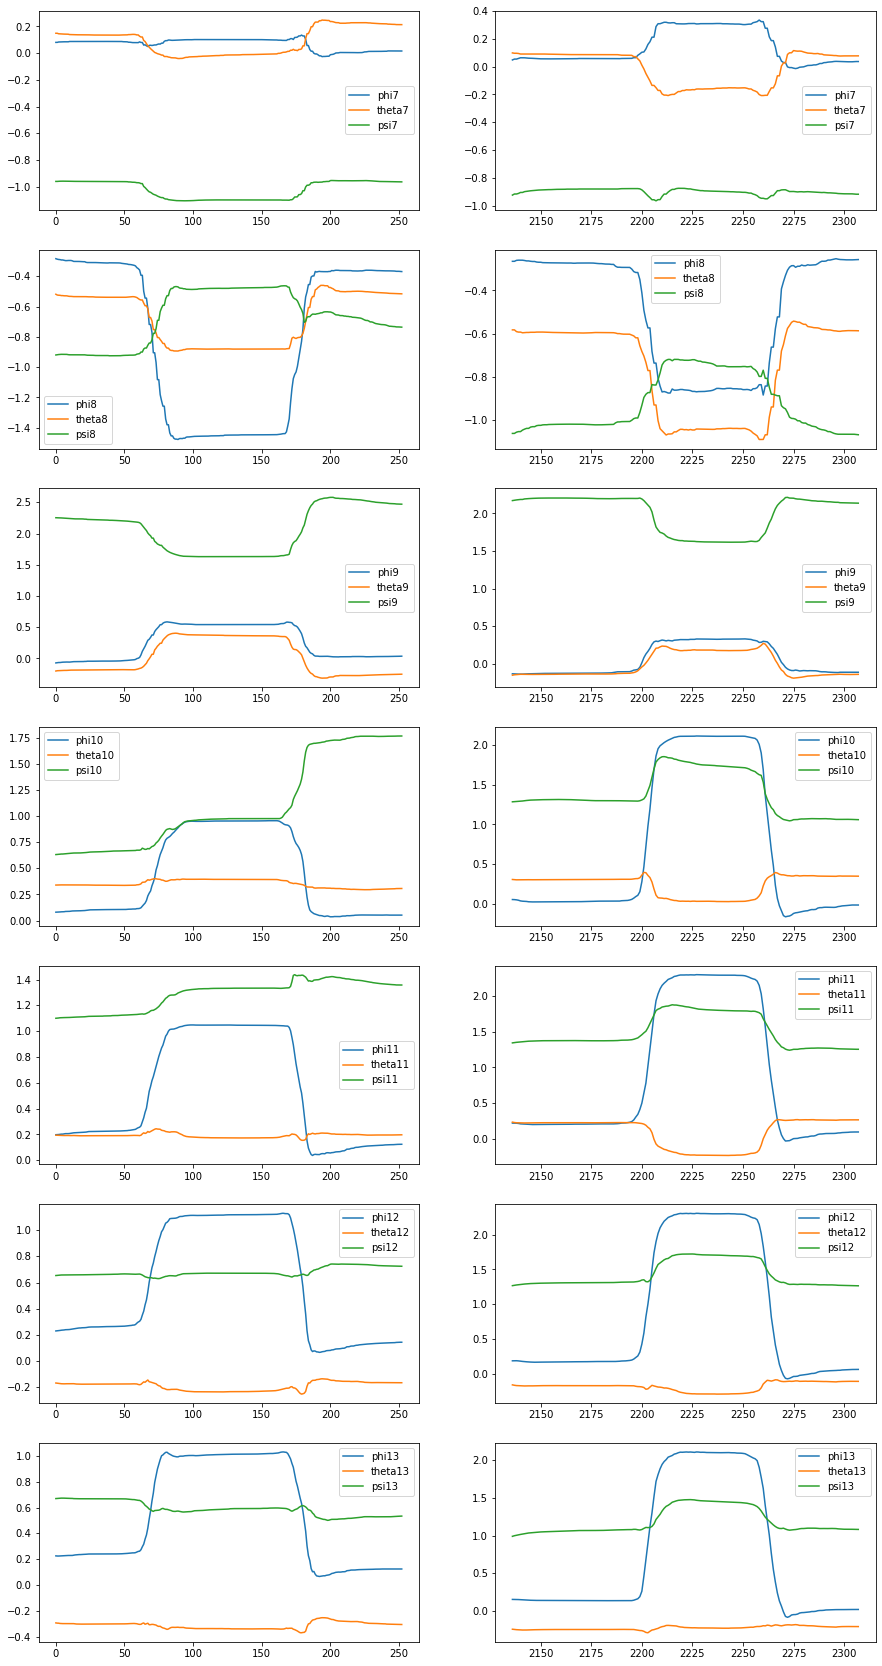

In [38]:
# left column: angle_data per sensor for the first screwdriver testsequence
# right column: angle_data per sensor for the first fist testsequence
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(15,30))
u1 = index_recNum_list_srewdriver[0]
u2 = index_recNum_list_srewdriver[1]
v1 = index_recNum_list_fist[0]
v2 = index_recNum_list_fist[1]
for temp_ind in range(0,7):
    cols = ["phi"+str(temp_ind+7),"theta"+str(temp_ind+7),"psi"+str(temp_ind+7)]
    pure_data.iloc[u1:u2].plot(y=cols,ax=axes[temp_ind,0])
    pure_data.iloc[v1:v2].plot(y=cols,ax=axes[temp_ind,1])

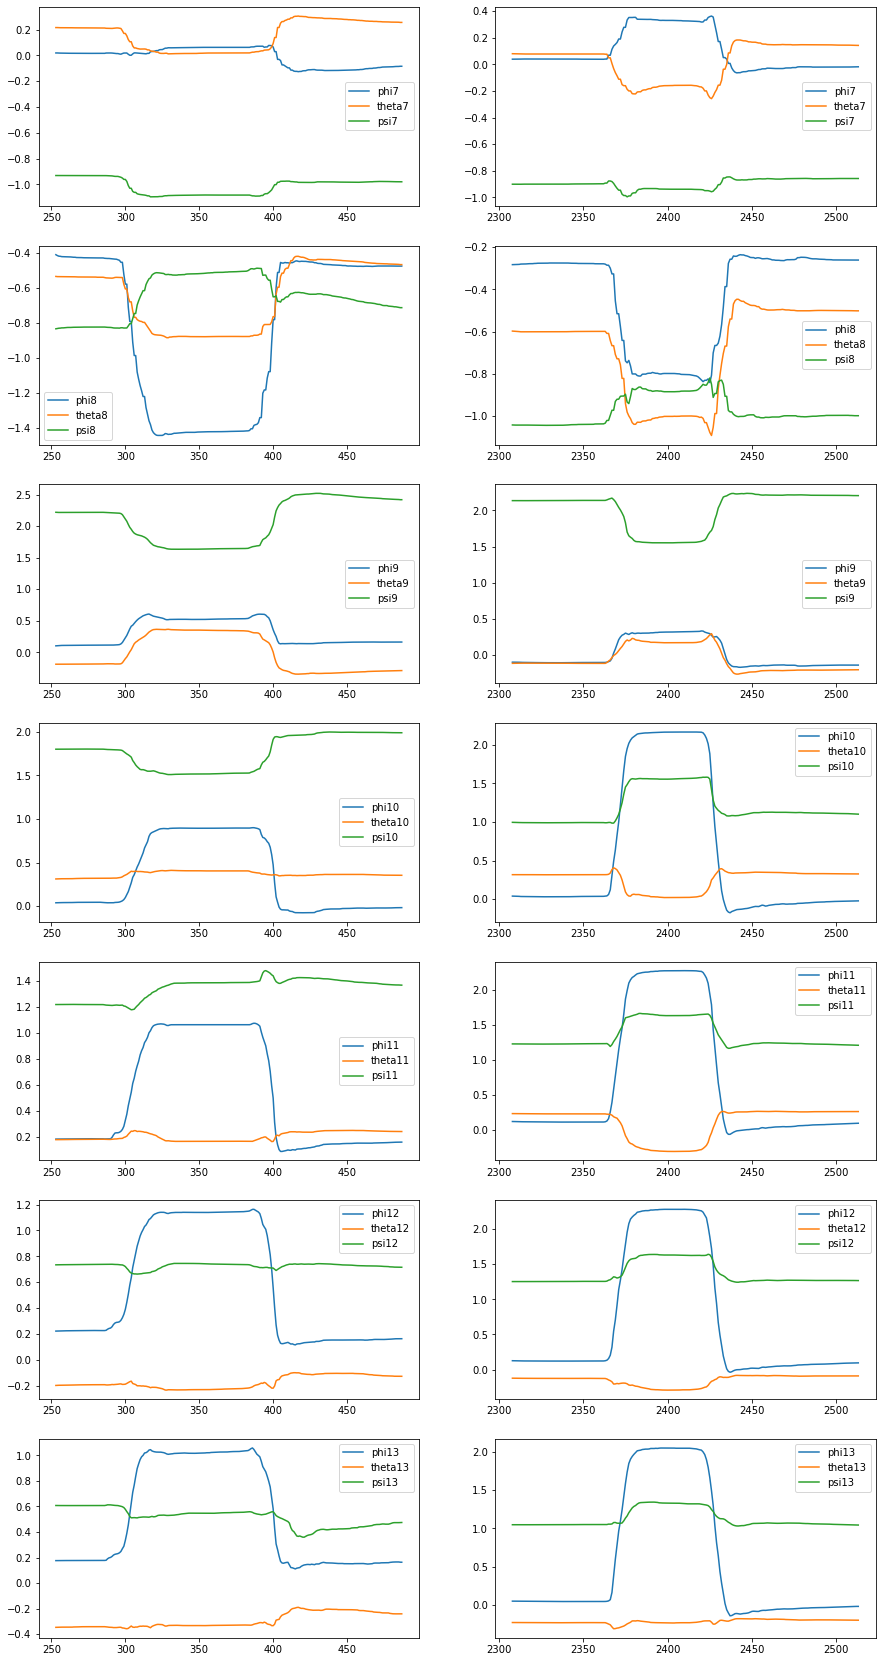

In [39]:
# left column: angle_data per sensor for the second screwdriver testsequence
# right column: angle_data per sensor for the second fist testsequence
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(15,30))
u1 = index_recNum_list_srewdriver[1]
u2 = index_recNum_list_srewdriver[2]
v1 = index_recNum_list_fist[1]
v2 = index_recNum_list_fist[2]
for temp_ind in range(0,7):
    cols = ["phi"+str(temp_ind+7),"theta"+str(temp_ind+7),"psi"+str(temp_ind+7)]
    pure_data.iloc[u1:u2].plot(y=cols,ax=axes[temp_ind,0])
    pure_data.iloc[v1:v2].plot(y=cols,ax=axes[temp_ind,1])

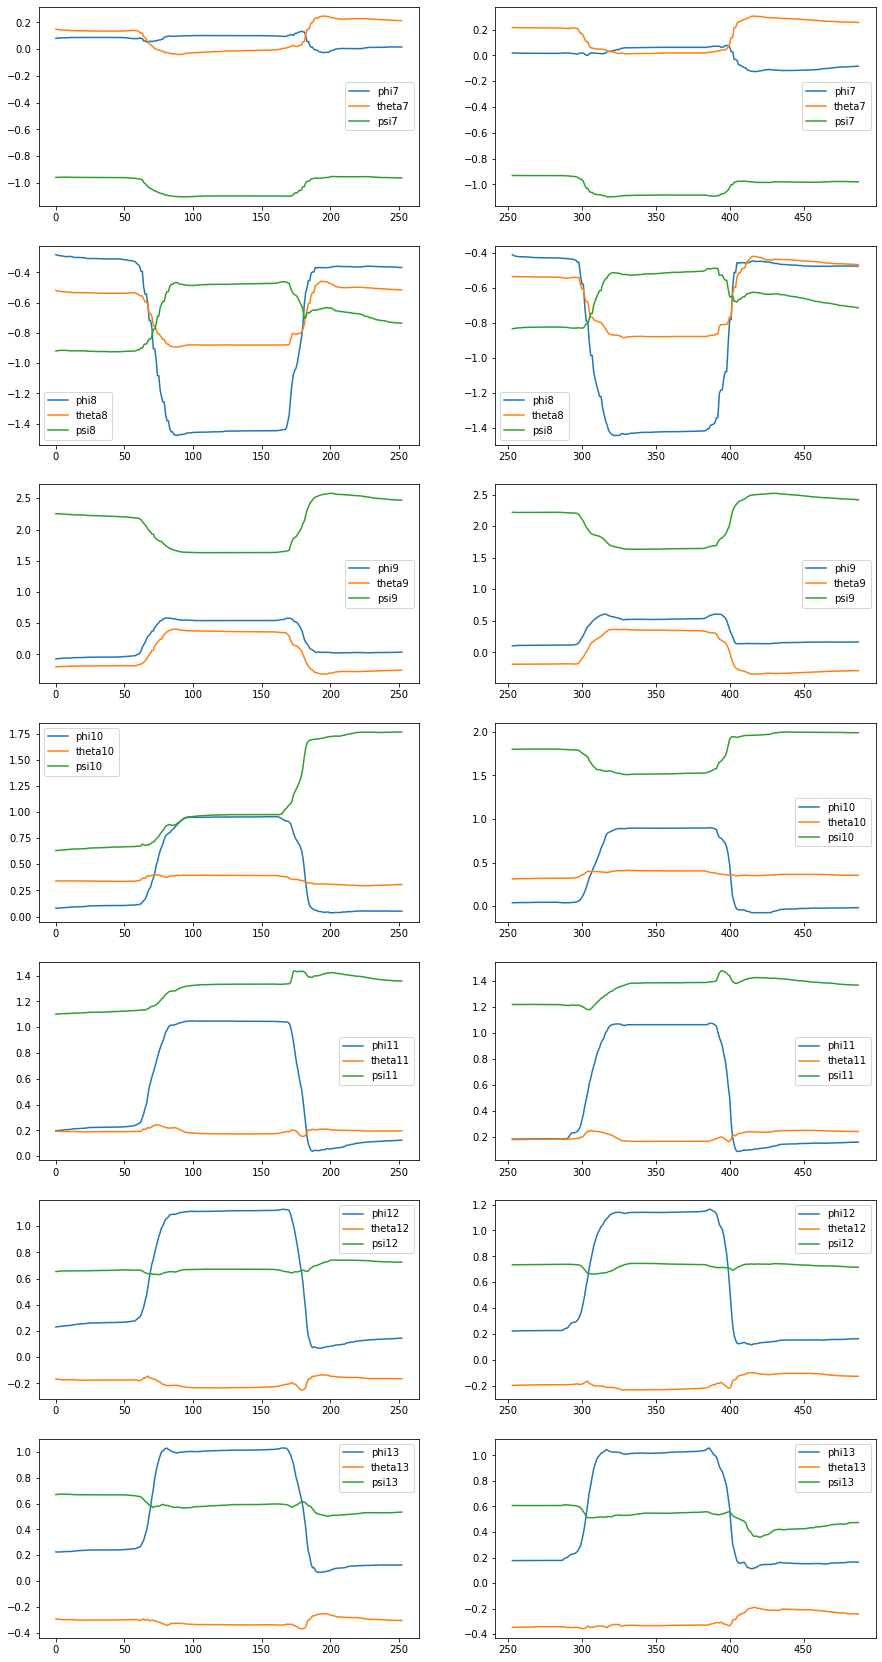

In [40]:
# left column: angle_data per sensor for the first screwdriver testsequence
# right column: angle_data per sensor for the second screwdriver testsequence
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(15,30))
u1 = index_recNum_list_srewdriver[0]
u2 = index_recNum_list_srewdriver[1]
v1 = index_recNum_list_srewdriver[1]
v2 = index_recNum_list_srewdriver[2]
for temp_ind in range(0,7):
    cols = ["phi"+str(temp_ind+7),"theta"+str(temp_ind+7),"psi"+str(temp_ind+7)]
    pure_data.iloc[u1:u2].plot(y=cols,ax=axes[temp_ind,0])
    pure_data.iloc[v1:v2].plot(y=cols,ax=axes[temp_ind,1])

In [41]:
a = pure_data["theta7"].iloc[u1:u2]
b = pure_data["theta8"].iloc[u1:u2]
a.corr(b)

0.9595796197936932

#### left hand wasnt moved -> can be used to test the algorithms with dummy data

In [42]:
X_test_noMovement = result.loc[index_recNum_list_fist[0]:index_recNum_list_fist[1]].values
X_test_noMovement = X_test_noMovement[:,3:(3+6*7)]
X_test_noMovement.shape

(173, 42)

# Classification

In [43]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

In [44]:
# shuffle
cols = list(pure_data.columns[:-1])
X = pure_data[cols].values
Y = pure_data["label"].values
X_train_shuffle,X_test_shuffle,Y_train_shuffle,Y_test_shuffle = model_selection.train_test_split(
    X,Y,test_size=0.8,shuffle=True,random_state=42)

In [45]:
results = []
names = []
for name, model in models:
    print(name+"\n")
    model.fit(X_train_shuffle,Y_train_shuffle)
    prediction = model.predict(X_test_shuffle)
    print(accuracy_score(Y_test_shuffle,prediction))
    print(confusion_matrix(Y_test_shuffle,prediction))
    print(classification_report(Y_test_shuffle,prediction))
    print("\n")
    print("\n")
    print("\n")

LR

0.9991818925552223
[[1708    0]
 [   3 1956]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1708
           2       1.00      1.00      1.00      1959

    accuracy                           1.00      3667
   macro avg       1.00      1.00      1.00      3667
weighted avg       1.00      1.00      1.00      3667







LDA

1.0
[[1708    0]
 [   0 1959]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1708
           2       1.00      1.00      1.00      1959

    accuracy                           1.00      3667
   macro avg       1.00      1.00      1.00      3667
weighted avg       1.00      1.00      1.00      3667







KNN

0.9893646032178893
[[1691   17]
 [  22 1937]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1708
           2       0.99      0.99      0.99      1959

    accuracy                     

In [46]:
# testing input shape
pure_data.shape[0]-(X_train_shuffle.shape[0]+X_test_shuffle.shape[0])

0

## accuracy is pretty good -> only the acc values are used

In [47]:
cols_acc = []
for col in pure_data.columns:
    if "phi" not in col and "theta" not in col and "psi" not in col and "label" not in col:
        cols_acc.append(col)

In [48]:
X = pure_data[cols_acc]
X_train_shuffle,X_test_shuffle,Y_train_shuffle,Y_test_shuffle = model_selection.train_test_split(
    X,Y,test_size=0.8,shuffle=True,random_state=42)

In [49]:
results = []
names = []
for name, model in models:
    print(name+"\n")
    model.fit(X_train_shuffle,Y_train_shuffle)
    prediction = model.predict(X_test_shuffle)
    print(accuracy_score(Y_test_shuffle,prediction))
    print(confusion_matrix(Y_test_shuffle,prediction))
    print(classification_report(Y_test_shuffle,prediction))
    print("\n")
    print("\n")
    print("\n")

LR

0.5418598309244614
[[ 314 1394]
 [ 286 1673]]
              precision    recall  f1-score   support

           1       0.52      0.18      0.27      1708
           2       0.55      0.85      0.67      1959

    accuracy                           0.54      3667
   macro avg       0.53      0.52      0.47      3667
weighted avg       0.54      0.54      0.48      3667







LDA

0.5434960458140169
[[ 374 1334]
 [ 340 1619]]
              precision    recall  f1-score   support

           1       0.52      0.22      0.31      1708
           2       0.55      0.83      0.66      1959

    accuracy                           0.54      3667
   macro avg       0.54      0.52      0.48      3667
weighted avg       0.54      0.54      0.50      3667







KNN

0.7281156258521952
[[1206  502]
 [ 495 1464]]
              precision    recall  f1-score   support

           1       0.71      0.71      0.71      1708
           2       0.74      0.75      0.75      1959

    accuracy      

In [50]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [51]:
from sklearn_porter import Porter

C:\Users\Daniel\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.weight_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated i

In [52]:
clf = DecisionTreeClassifier()
clf.fit(X_train_shuffle,Y_train_shuffle)

DecisionTreeClassifier()

In [53]:
porter = Porter(clf, language='java')
output = porter.export(embed_data=True)
print(output)

class DecisionTreeClassifier {

    private static int findMax(int[] nums) {
        int index = 0;
        for (int i = 0; i < nums.length; i++) {
            index = nums[i] > nums[index] ? i : index;
        }
        return index;
    }

    public static int predict(double[] features) {
        int[] classes = new int[2];
            
        if (features[7] <= -0.05785500071942806) {
            if (features[12] <= 0.053450001403689384) {
                if (features[9] <= -0.0041810000548139215) {
                    if (features[6] <= -0.18997200578451157) {
                        if (features[20] <= -0.6787029802799225) {
                            classes[0] = 0; 
                            classes[1] = 1; 
                        } else {
                            classes[0] = 5; 
                            classes[1] = 0; 
                        }
                    } else {
                        if (features[7] <= -0.14100050181150436) {
                         

C:\Users\Daniel\anaconda3\envs\gputest\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
